In [297]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [298]:
#import dataset
data = pd.read_csv('archive.zip')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [299]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [300]:
data.shape

(200, 5)

In [301]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [303]:
#convert gender into numerical values
varlist =['Gender']
# Defining the map function
def binary_map(x):
    return x.map({'Female': 1, "Male": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


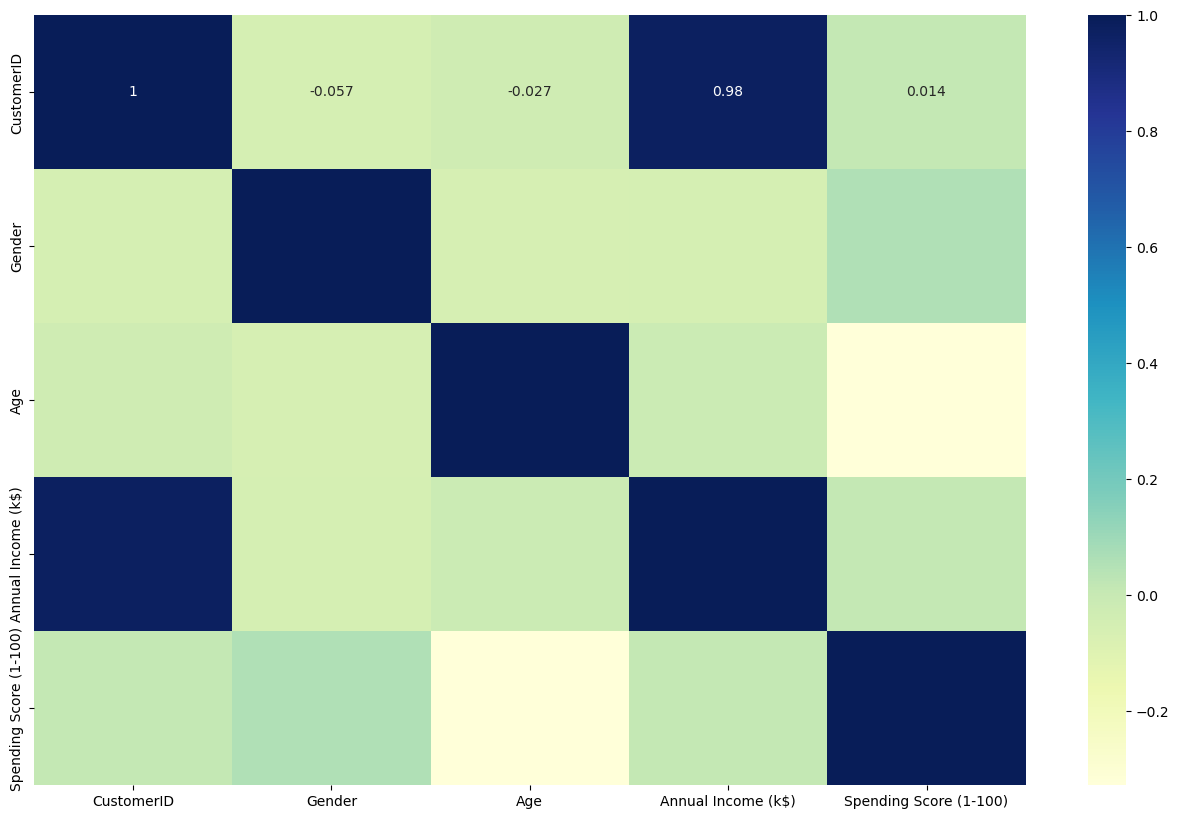

In [304]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [305]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [306]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns = data.columns
data = norm.fit_transform(data)
data = pd.DataFrame(data, columns = columns)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.021780,0.000000,0.413826,0.326705,0.849433
1,0.023520,0.000000,0.246956,0.176397,0.952546
2,0.113228,0.037743,0.754851,0.603881,0.226455
3,0.048755,0.012189,0.280342,0.195020,0.938536
4,0.093234,0.018647,0.578052,0.316997,0.745874


In [307]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [308]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data)
pred = kmeans.predict(data)

In [309]:
pred, len(pred)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 200)

In [310]:
kmeans.inertia_

15.159553294785812

In [311]:
kmeans.score(data)

-15.159553294785812

In [312]:
SSE = [] 
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

In [313]:
frame = pd.DataFrame({'Cluster': range(1,10), 'SSE':SSE})

Text(0, 0.5, 'Inertia')

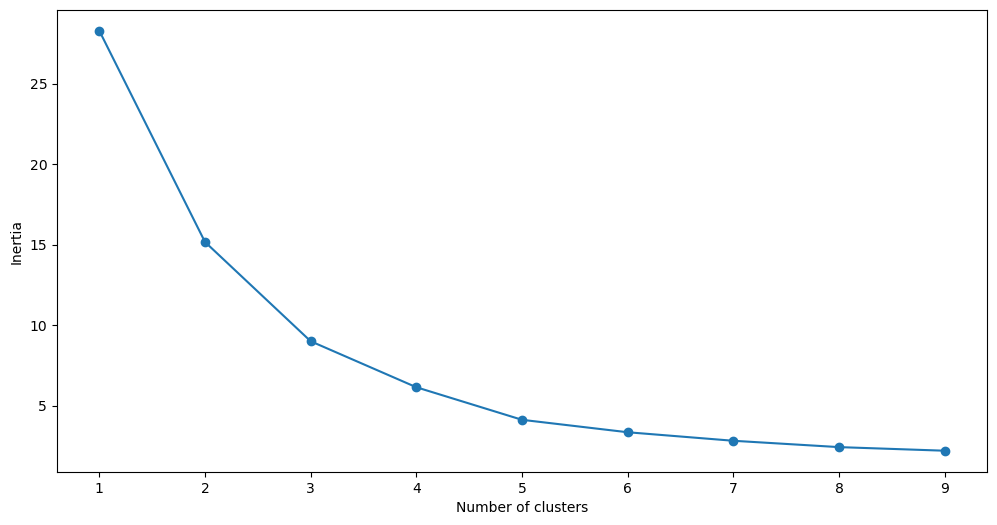

In [314]:
plt.figure(figsize= (12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [315]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(data)
pred = kmeans.predict(data)

In [316]:
data = pd.DataFrame(data)
data['cluster'] = pred

In [317]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0.021780,0.000000,0.413826,0.326705,0.849433,2
1,0.023520,0.000000,0.246956,0.176397,0.952546,2
2,0.113228,0.037743,0.754851,0.603881,0.226455,0
3,0.048755,0.012189,0.280342,0.195020,0.938536,2
4,0.093234,0.018647,0.578052,0.316997,0.745874,2


In [318]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster'],
      dtype='object')

In [319]:
def seg(str_x, str_y, cluster):
    x = []
    y = []
    for i in range(cluster):
        x.append(data[str_x][data['cluster']==i])
        y.append(data[str_y][data['cluster']==i])
    return x,y
def plot_clusters(str_x, str_y, cluster):
    plt.figure(figsize = (5,5), dpi = 120)
    x,y = seg(str_x, str_y, cluster)
    for i in range(cluster):
        plt.scatter(x[i], y[i], label = 'cluster()'.format(i))
        plt.xlabel(str_x)
        plt.ylabel(str_y)
        plt.title(str(str_x+"vs"+str_y))
        plt.legend()

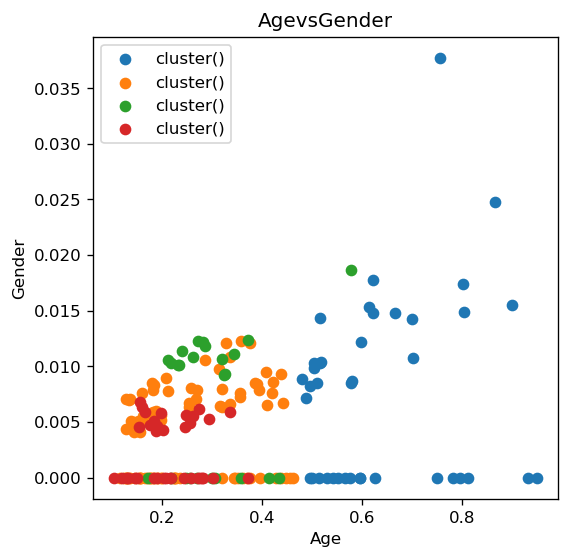

In [320]:
plot_clusters('Age','Gender',4)

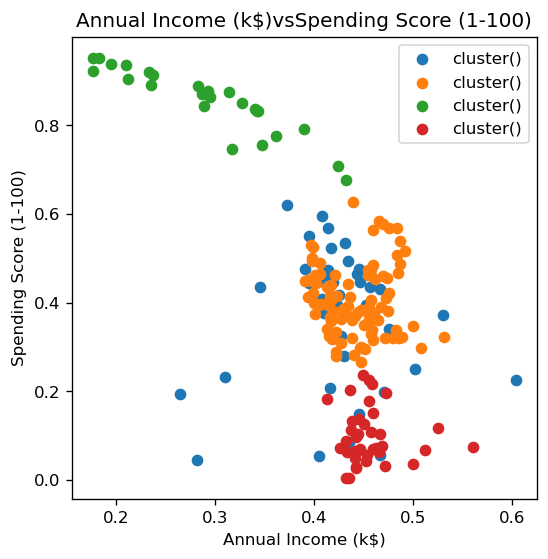

In [321]:
plot_clusters('Annual Income (k$)', 'Spending Score (1-100)', 4)

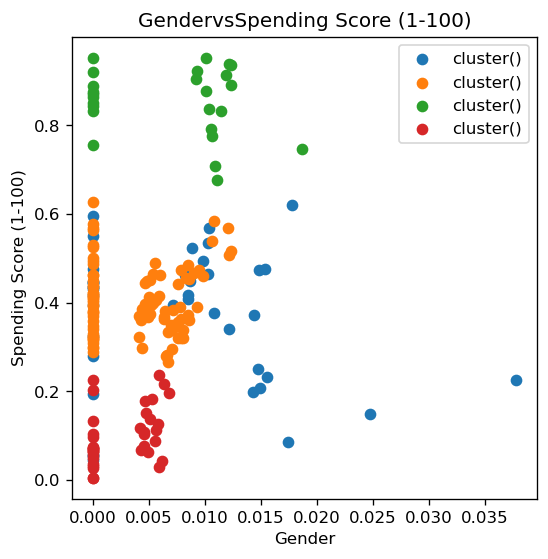

In [322]:
plot_clusters('Gender','Spending Score (1-100)',4)	

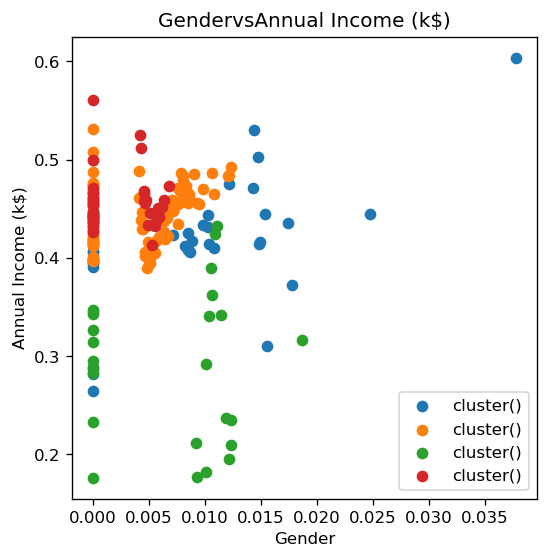

In [323]:
plot_clusters('Gender', 'Annual Income (k$)', 4)